#Package Installation


In [1]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=f6211be8764523bf9d549be38e35964d48cea924b2204f9da993d3913073d3e3
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 24.0 MB/s eta 0:00:00


#Import Libraries


In [2]:
from qiskit import *
from qiskit.visualization import plot_state_qsphere, plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Operator, Statevector
from qiskit_aer import AerSimulator

#Transmit classical bits of the combination 11 (c=1, d=1)


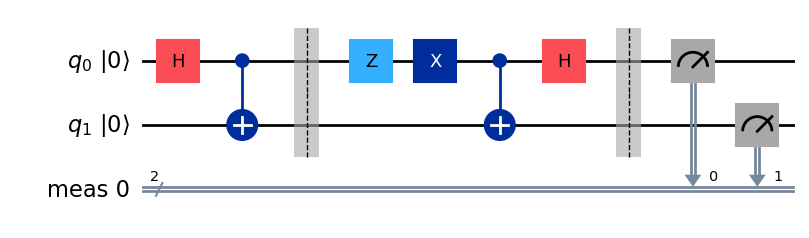

In [3]:
# Initialize 2 qubit quantum circuit

qc = QuantumCircuit(2)

# Bell entanglement state preparation

qc.h(0)
qc.cx(0,1)
qc.barrier()

# Setting the input/message to 11
c="1"
d="1"

# Encode the message [Since the qubits are both initialized at |0>, to get 11 we need to flip both qubits about the X axis. Thus making them |1> state.]

if d == "1":
  qc.z(0)            # Applies Z gate to qubit 0, if the first bit of the message is 1
if c == "1":
  qc.x(0)            # Applies X gate to qubit 0, if the second bit of the message is 1

# Inverse of entanglement preparation so that Bob receives the actual information
qc.cx(0,1)
qc.h(0)

# Measures the final states of the qubits

qc.measure_all()

# Drawing the circuit

qc.draw(output='mpl', initial_state = True)

In [4]:
# Simulation

circ = transpile(qc, AerSimulator())
res = AerSimulator().run(circ, shots = 1000).result()
counts = res.get_counts(circ)
print(counts)

{'11': 1000}
